# Aprendizagem Automática Avançada
## Assigment 4
### Luís Ferreirinha Nº51127
### Christopher Anaya Nª60566

## Problem 2

In [1]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from math import exp

### a) construct the model assuming all parameters known

Here we construct a Hidden Markov Model with all parameters known and evaluate the model against a subset of data generated previously from this model using a log probablility score.

In [2]:
rolls = np.array([[int(x) - 1] for x in "664153216162115234653214356634261655234232315142464156663246"])

# states: 1 = loaded, 0 = fair
dice = np.array([[1 if x == "L" else 0] for x in "LLLLLLLLLLLLLLFFFFFFLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFLLLLLLLL"])

In [3]:
# Create HMM with 2 states
casino_model = hmm.CategoricalHMM(n_components=2)
# Define number of features
casino_model.n_features = 6
# Define starting probabilitilies
casino_model.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
# Define transition probabilities
casino_model.transmat_ = np.array([[0.95, 0.05],
                                   [0.1, 0.90]])
# Defini emission probabilities
casino_model.emissionprob_ = np.array([[(1/6),(1/6),(1/6),(1/6),(1/6),(1/6)],
                                       [(1/10),(1/10),(1/10),(1/10),(1/10),(5/10)]])
print(casino_model.score(rolls[-10:]))
print(exp(casino_model.score(rolls[-10:])))

-16.98461390418157
4.204127747863525e-08


### b)

In this part we constructed another HMM will all parameters specified except the transition probabilities.  Then we trained the model for the transition matrix, evaluating with the log probability score, and generated a best transition probability matrix.  We also graphed the predicted state sequence to the ground truth state sequence.  We observe that predicted sequence changes between states more often than the ground truth sequence.

In [4]:
# Split dataset in train and validation
Xtrain = rolls[:-10]
Xvalidate = rolls[-10:]

# Number of runs
runs = 50

best_score = best_model = None
for i in range(runs):
    # Start HMM model without transition probabilities
    casino_model_b = hmm.CategoricalHMM(n_components=2, init_params='t',n_iter=1000, tol=0.001)
    casino_model_b.n_features = 6
    casino_model_b.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
    casino_model_b.emissionprob_ = np.array([[(1/6),(1/6),(1/6),(1/6),(1/6),(1/6)],
                                       [(1/10),(1/10),(1/10),(1/10),(1/10),(5/10)]])
    casino_model_b.fit(Xtrain)
    score = casino_model_b.score(Xvalidate)
    if best_score is None or score > best_score:
        best_score = score
        best_model = casino_model_b

In [5]:
print("Best model:")
print("Transition Probabilitilies:")
print(best_model.transmat_)
print("Score:")
print(best_score)
print(exp(best_score))

Best model:
Transition Probabilitilies:
[[4.34665025e-04 9.99565335e-01]
 [8.93803005e-01 1.06196995e-01]]
Score:
-16.16255401003451
9.565154294504716e-08


/tmp/ipykernel_7680/318103204.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


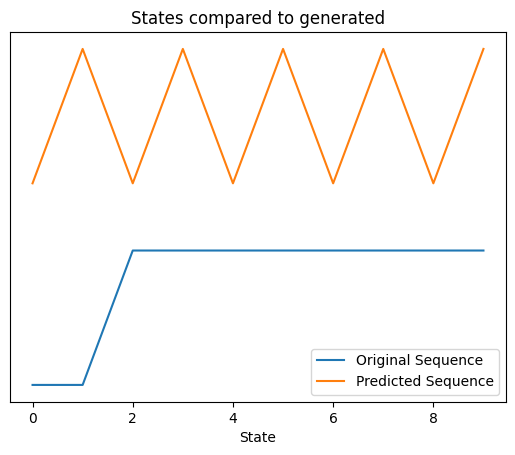

In [6]:
states = best_model.predict(rolls[-10:])

fig, ax = plt.subplots()
ax.plot(dice[-10:], label='Original Sequence')
ax.plot(states + 1.5, label='Predicted Sequence')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

As we can see by the plot our predicted sequence fails to replicate the original sequence. This is probably due to the small dataset that was used to train the model, if we increase the size of our dataset we will most likely see some resemble between the two sequences.

### c)

Here we use data where we don't know the underlying model in advance.  The data is divided into a 50/50 training testing split.  In the first part we set the starting probabilities and number of states and leave the transition and emission probabilities as unknown.  The model is trained on the training set and scored on the testing set, along with the estimated parameters.  In the second part, all probabilities including the number of states are left unknown.  The number of states isn't directly learned, rather we run the learning procedure for models with 1-4 states specified.  We also graph the predicted states sequence from the first part to the ground truth states sequence and similarly observe that the predicted sequence has more variability than the ground truth sequence.

In [7]:
with open("rolls.txt",'r') as infile:
    dataset = infile.readlines()
    X = [[int(i)-1] for i in dataset]

with open("dice.txt","r") as infile:
    dataset = infile.readlines()
    Y = []
    for i in dataset:
        if i[0] == 'L':
            Y.append(1)
        else:
            Y.append(0)

# Split in Train and Validation
XTrain = X[int(-len(X)/2):]
XValidate = X[:int(-len(X)/2)]

#### i) 
First we assume that only the transition and emission matrices are unknown

In [8]:
# Create model with unknown transition and emission matrices
casino_model_c_i = hmm.CategoricalHMM(n_components=2, init_params='te',n_iter=1000, tol=0.001)
casino_model_c_i.n_features = 6
casino_model_c_i.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
casino_model_c_i.fit(XTrain)
score = casino_model_c_i.score(XValidate)
print('Score: ' + str(casino_model_c_i.score(XValidate)) + '\n')
print('Transition Matrix: \n' + str(casino_model_c_i.transmat_) + '\n')
print('Emission Matrix: \n' + str(casino_model_c_i.emissionprob_) + '\n')

Score: -953.7018885171245

Transition Matrix: 
[[0.93383014 0.06616986]
 [0.24906299 0.75093701]]

Emission Matrix: 
[[1.54768309e-01 1.50506320e-01 2.09281361e-01 1.80292784e-01
  1.36087304e-01 1.69063921e-01]
 [1.27660938e-01 5.69371874e-02 2.53948947e-05 3.13159899e-02
  1.37406684e-01 6.46653806e-01]]



Now we compare the original sequence with the one generated by our model

/tmp/ipykernel_7680/649036025.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


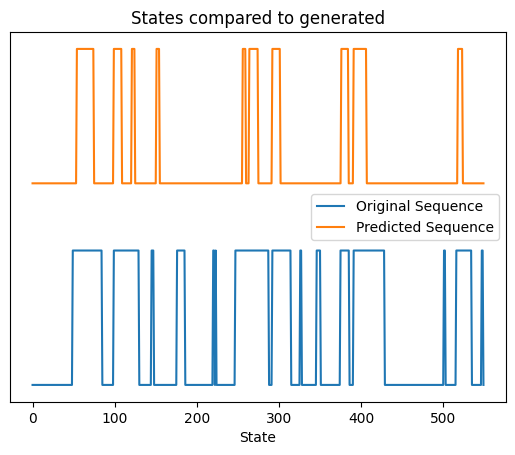

In [9]:
states = casino_model_c_i.predict(XValidate)

fig, ax = plt.subplots()
ax.plot(Y[:int(-len(X)/2)], label='Original Sequence')
ax.plot(states + 1.5, label='Predicted Sequence')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

##### ii) 
Now we assume all parameters are unknown and we vary the number of states from 1 to 5

In [18]:
best_score = best_model_c = n_state = None
for state in range(1,5):
    model = hmm.CategoricalHMM(n_components=state, n_iter=1000, tol=0.001)
    model.n_features = 6
    model.fit(XTrain)
    score = model.score(XValidate)
    if best_score is None or score > best_score:
        best_score = score
        best_model_c = model
        n_state = state
    print('For the HMM with %d state(s):\n'%state)
    print('Score: ' + str(model.score(XValidate)) + '\n')
    print('Transition matrix:\n' + str(model.transmat_) + '\n')
    print('Emission matrix:\n' + str(model.emissionprob_) + '\n')
    print('Starting probabilities matrix:\n' + str(model.startprob_) + '\n')

For the HMM with 1 state(s):

Score: -954.6136116308819

Transition matrix:
[[1.]]

Emission matrix:
[[0.14909091 0.13090909 0.16545455 0.14909091 0.13636364 0.26909091]]

Starting probabilities matrix:
[1.]

For the HMM with 2 state(s):

Score: -954.3419752268456

Transition matrix:
[[0.74425165 0.25574835]
 [0.29401852 0.70598148]]

Emission matrix:
[[0.13112423 0.07374668 0.09503319 0.04666854 0.15375932 0.49966804]
 [0.16964721 0.19631059 0.24602606 0.26627589 0.11646063 0.00527962]]

Starting probabilities matrix:
[9.7461825e-14 1.0000000e+00]

For the HMM with 3 state(s):

Score: -963.4130570830179

Transition matrix:
[[1.35928434e-03 9.84221922e-01 1.44187940e-02]
 [8.78335161e-04 2.01749040e-02 9.78946761e-01]
 [6.07288431e-01 1.63715040e-01 2.28996529e-01]]

Emission matrix:
[[0.17009568 0.0894122  0.18954062 0.18566798 0.00698584 0.35829768]
 [0.19491041 0.0184481  0.1272205  0.26861778 0.05677445 0.33402875]
 [0.10048265 0.24405041 0.18051086 0.03345428 0.27773032 0.16377148

In [20]:
# best model scores
print(f"Best model was for HMM with {n_state} states")
print('Score: ' + str(best_model_c.score(XValidate)) + '\n')
print('Transition matrix:\n' + str(best_model_c.transmat_) + '\n')
print('Emission matrix:\n' + str(best_model_c.emissionprob_) + '\n')
print('Starting probabilities matrix:\n' + str(best_model_c.startprob_) + '\n')

Best model was for HMM with 2 states
Score: -954.3419752268456

Transition matrix:
[[0.74425165 0.25574835]
 [0.29401852 0.70598148]]

Emission matrix:
[[0.13112423 0.07374668 0.09503319 0.04666854 0.15375932 0.49966804]
 [0.16964721 0.19631059 0.24602606 0.26627589 0.11646063 0.00527962]]

Starting probabilities matrix:
[9.7461825e-14 1.0000000e+00]



Now we can check the predicted sequence vs the original sequence for the model with the best score

/tmp/ipykernel_7680/4245498201.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


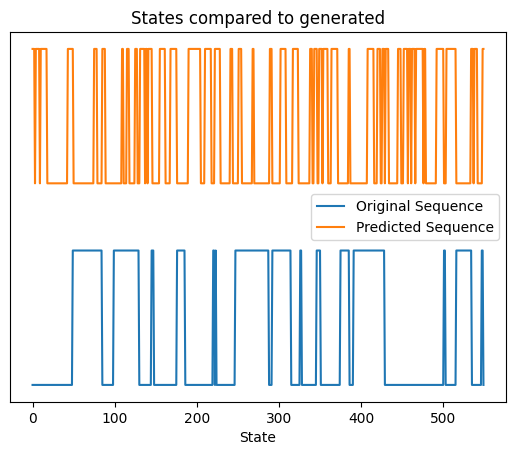

In [19]:
states = best_model_c.predict(XValidate)

fig, ax = plt.subplots()
ax.plot(Y[:int(-len(X)/2)], label='Original Sequence')
ax.plot(states + 1.5, label='Predicted Sequence')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

As we can see by comparing the two plots the results get significantly worse when we do not know the starting probabilities and number of states.

### d)

In this part we sample from the model in part a and repeat the procedure in part c

In [13]:
# Create a dataset from our model
X_d, y_d = casino_model.sample(n_samples=30000)
X_d, y_d = X_d.reshape(-1,1), y_d.reshape(-1,1)
X_d_train = X_d[int(-len(X_d)/2):]
X_d_test = X_d[:int(-len(X_d)/2)]

Now we repeat exercise c) with this new dataset

First we start with unknown transition and emission probabilitlies

In [14]:
# Create model with unknow transition and emission probabilities
casino_model_d_i = hmm.CategoricalHMM(n_components=2, init_params='te',n_iter=1000, tol=0.001)
casino_model_d_i.n_features = 6
casino_model_d_i.startprob_ = np.array([(0.1 / (0.05+0.1)),(0.05/(0.05+0.1))])
casino_model_d_i.fit(X_d_train)
score = casino_model_d_i.score(X_d_test)
print('Score: ' + str(casino_model_d_i.score(X_d_test)) + '\n')
print('Transition Matrix: \n' + str(casino_model_d_i.transmat_) + '\n')
print('Emission Matrix: \n' + str(casino_model_d_i.emissionprob_) + '\n')

Score: -26360.798038728546

Transition Matrix: 
[[0.75867596 0.24132404]
 [0.91911816 0.08088184]]

Emission Matrix: 
[[0.1681459  0.16234287 0.16584489 0.12854053 0.10031787 0.27480795]
 [0.0472213  0.10458999 0.0720154  0.20256327 0.29371081 0.27989923]]



Now with all probabilities unknown

In [15]:
best_score = best_model_d = n_states_d = None
for state in range(1,5):
    model = hmm.CategoricalHMM(n_components=state, n_iter=1000, tol=0.001)
    model.n_features = 6
    model.fit(X_d_train)
    score = model.score(X_d_test)
    if best_score is None or score > best_score:
        best_score = score
        best_model_d = model
        n_state_d = state
    print('For the HMM with %d state(s):\n'%state)
    print('Score: ' + str(model.score(X_d_test)) + '\n')
    print('Transition matrix:\n' + str(model.transmat_) + '\n')
    print('Emission matrix:\n' + str(model.emissionprob_) + '\n')
    print('Starting probabilities matrix:\n' + str(model.startprob_) + '\n')

For the HMM with 1 state(s):

Score: -26358.066103055622

Transition matrix:
[[1.]]

Emission matrix:
[[0.143      0.15033333 0.14633333 0.14393333 0.14053333 0.27586667]]

Starting probabilities matrix:
[1.]

For the HMM with 2 state(s):

Score: -26176.142083673298

Transition matrix:
[[0.90706158 0.09293842]
 [0.04676196 0.95323804]]

Emission matrix:
[[0.10034881 0.10325036 0.10062479 0.09457685 0.10668917 0.49451003]
 [0.16449242 0.17405898 0.16936638 0.16880462 0.15758779 0.16568981]]

Starting probabilities matrix:
[1.000000e+00 1.196534e-36]

For the HMM with 3 state(s):

Score: -26181.641282867735

Transition matrix:
[[7.77124096e-01 1.99288305e-02 2.02947074e-01]
 [6.72009250e-06 8.93529227e-01 1.06464053e-01]
 [7.34631149e-01 1.68001747e-01 9.73671033e-02]]

Emission matrix:
[[0.16319217 0.12574568 0.1493265  0.20861407 0.16836497 0.18475661]
 [0.09951911 0.08680385 0.09201064 0.10728419 0.10904909 0.50533313]
 [0.17201338 0.37096165 0.25584568 0.01133586 0.11801038 0.0718330

In [16]:
# best model scores
print(f"Best model was for HMM with {n_state_d} states")
print('Score: ' + str(best_model_d.score(X_d_test)) + '\n')
print('Transition matrix:\n' + str(best_model_d.transmat_) + '\n')
print('Emission matrix:\n' + str(best_model_d.emissionprob_) + '\n')
print('Starting probabilities matrix:\n' + str(best_model_d.startprob_) + '\n')

Best model was for HMM with 2 states
Score: -26176.142083673298

Transition matrix:
[[0.90706158 0.09293842]
 [0.04676196 0.95323804]]

Emission matrix:
[[0.10034881 0.10325036 0.10062479 0.09457685 0.10668917 0.49451003]
 [0.16449242 0.17405898 0.16936638 0.16880462 0.15758779 0.16568981]]

Starting probabilities matrix:
[1.000000e+00 1.196534e-36]



As we can see when comparing the transition matrixes between the model trained with the starting probabilities and the one trained without, they are very diferent. The starting probabilities obtained by the second model are also very diferent from the ones that were defined for the problem. Despite all that, the model trained without the starting probabilities seems to have achieved an almost ideal emission matrix, clearly showing the chances for the loaded and fair dice.